<a href="https://colab.research.google.com/github/kfaisalofficial/Hotel-booking-analysis/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [3]:
#version of pandas running on the system
pd.__version__ 

'1.3.5'

In [4]:
#version of numpy running on the system
np.__version__

'1.21.5'

In [5]:
#mounting the drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [6]:
#importing the data
file_path="/content/drive/MyDrive/Colab Notebooks/hotel analysis/"
hotel_df=pd.read_csv(file_path+"Copy of Hotel Bookings.csv")

In [7]:
#copying the dataset
df=hotel_df.copy(deep=True)

In [8]:
#information about the dataframe
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
#first 5 rows of the data frame
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [10]:
#To know no of rows and columns in the data frame
hotel_df.shape

(119390, 32)

In [11]:
#basic statistical details-percentiles between 20 and 50 and data type of int and float
hotel_df.describe(percentiles=[.20,.50],include=[int,float])

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
20%,0.000000,11.000000,2016.000000,14.000000,7.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,45.000000,0.000000,64.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# Finding the null values

In [12]:
hotel_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [13]:
hotel_df.isnull().sum().sort_values(ascending=False)[:10]

company                   112593
agent                      16340
country                      488
children                       4
reserved_room_type             0
assigned_room_type             0
booking_changes                0
deposit_type                   0
hotel                          0
previous_cancellations         0
dtype: int64

# Filling the null values with relevant values 

In [14]:

hotel_df[['agent','company']] =hotel_df[['agent','company']].fillna(0.0)


In [15]:

hotel_df['country'].fillna(hotel_df.country.mode()[0], inplace=True)

In [16]:
hotel_df['children'].fillna(round(hotel_df.children.mean()), inplace=True)

# removing the rows which are not contributing to the dataframe

In [17]:
hotel_df[(hotel_df.adults+hotel_df.babies+hotel_df.children)==0].shape

(180, 32)

In [18]:
hotel_df = hotel_df.drop(hotel_df[(hotel_df.adults+hotel_df.babies+hotel_df.children)==0].index)

**Removing the negative value in Adr column**

In [19]:
#checking the adr column description
hotel_df['adr'].describe()

count    119210.000000
mean        101.969092
std          50.434007
min          -6.380000
25%          69.500000
50%          94.950000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

In [20]:
#checking rows having negative values
hotel_df[hotel_df['adr']<0].shape

(1, 32)

In [21]:
hotel_df.drop(hotel_df[hotel_df['adr']<0].index,inplace=True)

Removed the negative value as one data was out of the league and that will not affect much of the data

# Fixing the datatype

In [22]:
#finding the datatypes of each column
hotel_df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [23]:
#children, company and agent shuld have int dtype
hotel_df[["children","company","agent"]]=hotel_df[["children","company","agent"]].astype('int64')

# Bookings that were cancelled vs not cancelled

In [24]:
booking_cancelled_count=hotel_df["is_canceled"].value_counts()

In [25]:
booking_cancelled_count

0    75010
1    44199
Name: is_canceled, dtype: int64

Text(0.5, 1.0, 'Booking got cancelled vs not cancelled')

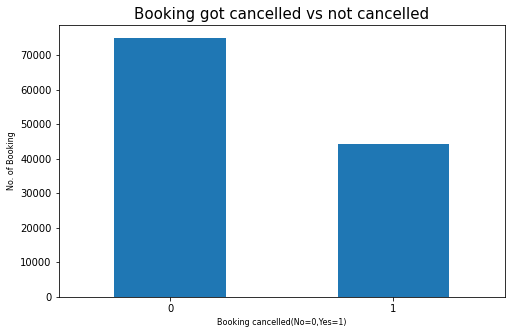

In [26]:
plot1=booking_cancelled_count.plot(kind='bar',rot=0,figsize=(8,5))
plt.xlabel("Booking cancelled(No=0,Yes=1)",fontsize=8)
plt.ylabel("No. of Booking",fontsize=8)
plt.title("Booking got cancelled vs not cancelled",fontsize=15)


**For further analysis, We will select only those bookings which did not get canceled**

In [27]:
hotel_df_not_canceled = hotel_df[hotel_df['is_canceled'] == 0]

In [76]:
hotel_df_canceled= hotel_df[hotel_df['is_canceled'] == 1]

In [28]:
hotel_df_not_canceled

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394,0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9,0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89,0,0,Transient,104.40,0,0,Check-Out,2017-09-07


# Finding the ratio of booking between the hotels

In [29]:
hotel_counts=hotel_df_not_canceled["hotel"].value_counts()

In [30]:
hotel_counts

City Hotel      46084
Resort Hotel    28926
Name: hotel, dtype: int64

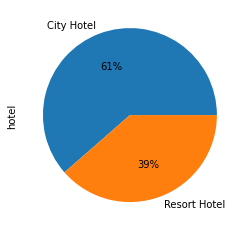

In [31]:
hotel_counts.plot(kind='pie',autopct='%1.0f%%')

city hotel has 66% of the total bookings and Resort hotel has 34%

# Busiest month for hotels

In [32]:
booking_months_count=hotel_df_not_canceled["arrival_date_month"].value_counts()

In [33]:
booking_months_count

August       8624
July         7907
May          7103
October      6901
March        6619
April        6560
June         6395
September    6385
February     5359
November     4651
December     4391
January      4115
Name: arrival_date_month, dtype: int64

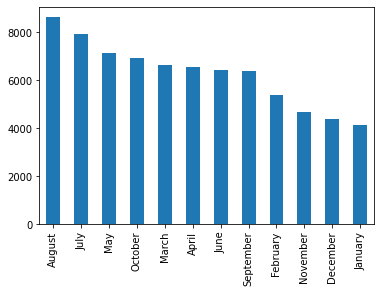

In [34]:
booking_months_count.plot(kind='bar')

# Year-wise booking comparison

In [35]:
year_wise_booking=hotel_df_not_canceled['arrival_date_year'].value_counts()

In [36]:
year_wise_booking

2016    36299
2017    24885
2015    13826
Name: arrival_date_year, dtype: int64

Text(0.5, 1.0, 'Year-wise comparison')

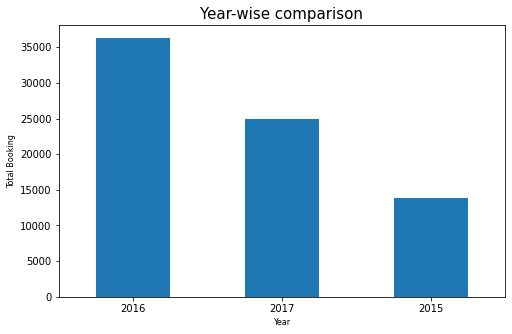

In [37]:
year_wise_booking.plot(kind='bar', figsize=(8,5),rot=0)
plt.xlabel("Year",fontsize=8)
plt.ylabel("Total Booking",fontsize=8)
plt.title("Year-wise comparison",fontsize=15)

**2016** has the highest no of bookings and the trend can be seen that bookings are **increasing** year by year

Text(0.5, 1.0, 'Pie chart for year wise booking comparison')

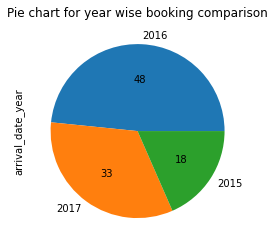

In [38]:
#pie chart for arrival date year
hotel_df_not_canceled['arrival_date_year'].value_counts().plot(kind='pie',autopct='%.0f')
plt.title('Pie chart for year wise booking comparison')

**48%** percent booking in year **2016** which is approximately **half of the total booking** has been in the year 2016(33%in 2017 and 18% in 2015)

# Popular Meal

In [39]:
meal_count=hotel_df_not_canceled["meal"].value_counts()

In [40]:
meal_count

BB           57729
HB            9475
SC            6603
Undefined      883
FB             320
Name: meal, dtype: int64

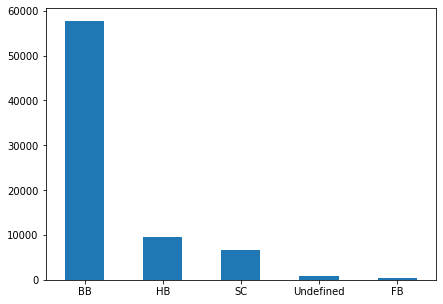

In [41]:
meal_count.plot(kind='bar',figsize=(7,5),rot=0)

BB meal is most popular and FB is least

# analysing the booking country wise

In [42]:
bookings_from_country=hotel_df_not_canceled["country"].value_counts()[:10]

In [43]:
bookings_from_country

PRT    21398
GBR     9667
FRA     8468
ESP     6383
DEU     6067
IRL     2542
ITA     2428
BEL     1868
NLD     1716
USA     1592
Name: country, dtype: int64

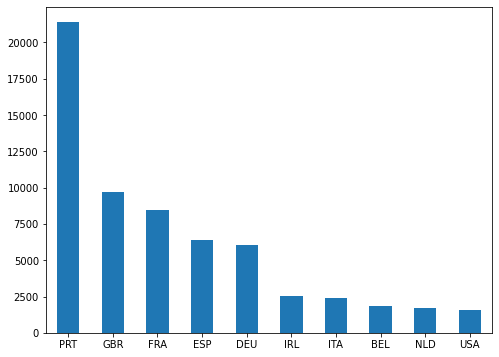

In [44]:
bookings_from_country.plot(kind='bar',figsize=(8,6),rot=0)

The highest bookings are from PRT country

# analyzing Lead time

In [45]:
#lead time is time difference between hotel booked and arrival
leadtime=hotel_df_not_canceled['lead_time'].value_counts()

In [46]:
leadtime

0      5847
1      3127
2      1852
3      1633
4      1535
       ... 
709       1
454       1
737       1
370       1
399       1
Name: lead_time, Length: 422, dtype: int64

so here we cannot group them as grouping will not be meaningfull so we will plot box plot to find the distribution

In [47]:
#plotting lead time for hotels
fig=px.box(hotel_df_not_canceled,y='lead_time',x='hotel',width=900,height=700,title="Lead time analysis for hotels")
fig.show()

As seen from the box plot
**Resort hotel**- the minimum lead time is 0 and most of the time is between 5 to 131 and median is 38 but there are many data above 131 and max lead upto 737
**City hotel**- the minimum lead time is 0 and most of the time is between 12 and 121 and median is 50 but there are many data above 121 and reaching max upto 518


# **Analysis on adr(average daily revenue)**

In [48]:
#plotting for adr for different hotels
fig=px.box(hotel_df_not_canceled,y='adr',x='hotel',width=900,height=700,title="Adr analysis for hotels")
fig.show()

As we can see that city hotel median is 100 and of resort hotel is 72.
The city hotel has most of the adr between 80-126 and maximum upto 510, while the resort hotel has most of the adr between 48-118.24 and maximum upto 508.

In [49]:
px.histogram(hotel_df_not_canceled,x='adr',color='hotel')

The histogram clearly shows that the city hotel has more adr than resort hotel

# **Analysis of deposit type**

In [65]:
deposit_of_notcancelled=hotel_df_not_canceled["deposit_type"].value_counts()

In [66]:
deposit_of_notcancelled

No Deposit    74791
Refundable      126
Non Refund       93
Name: deposit_type, dtype: int64

Text(0.5, 1.0, 'Types of Deposits')

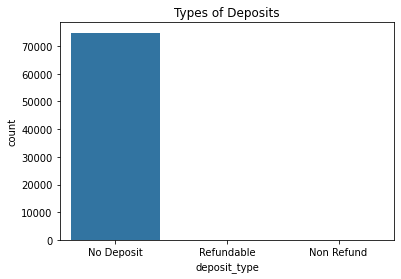

In [77]:
sns.countplot(data=hotel_df_not_canceled,x='deposit_type').set_title("Types of Deposits")